# Bank_Marketing_Data_Set

### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

There are over 41k records and 21 variables 

First is to have a look the number of subscription of term deposit

In [5]:
data[data['y']=='yes'].shape[0]

4640

In [6]:
data[data['y']=='no'].shape[0]

36548

There are 4640 records with subscription of term deposit, and 36548 records without subscription. Not a balanced dataset 

In [7]:
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

There is no missing value in dataset 

First we have a look on age distribution.

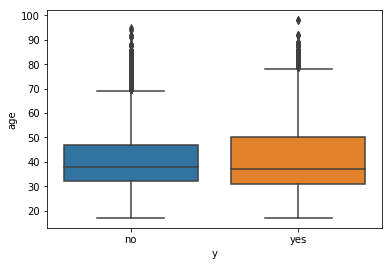

In [8]:
sns.boxplot(x='y',y='age',data=data)

The age distributions are similar to both cases, although the inter quatile rage for subscription is a little larger 

Second is job 

In [9]:
pd.crosstab(index=data.job,columns=data.y)

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


Among the subscription group, most are with admin. job. 
<br>We can further study the percentage of subscription per each job 

In [10]:
pd.crosstab(index=data.job,columns=data.y,normalize=0)

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


However, if we study the percentage of subscription per each job, we can know that both retired and student have a higher proportion of having subscription. Probably because these two groups of people need less risky investment than other people
<br>On the other hand, customers with jobs in blue-collar, entrepreneur,housemaid or serives have over 90% not subscribing term deposit. Appearantly job is a good indicator predicting whether customer will do term deposit

Another potential related characteristic on customer is marital status.

In [11]:
pd.crosstab(index=data.marital, columns=data.y,normalize=0)

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


Both married and divorced customers have lower ratios on subscription. 

Next study is on education. Probably more educated customers know more financial products and therefore less interest on time deposit 

In [12]:
pd.crosstab(index=data.education, columns=data.y,normalize=0)

y,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


Result is not so obvious. Ratio of subscription is largest on illiterate. However, mixed results are obsered from basic.4y till university.degree. Therefore education may not be a good prediction indicator.

There are three variables related to customer's financial background, default, housing, and loan. Let's have a look and see if there is any indication

In [13]:
financial_variable=['default','housing','loan']
for i in financial_variable:
    print(pd.crosstab(index=data[i],columns=data.y,normalize=0))
    print()

y             no      yes
default                  
no       0.87121  0.12879
unknown  0.94847  0.05153
yes      1.00000  0.00000

y              no       yes
housing                    
no       0.891204  0.108796
unknown  0.891919  0.108081
yes      0.883806  0.116194

y              no       yes
loan                       
no       0.886598  0.113402
unknown  0.891919  0.108081
yes      0.890685  0.109315



If you ar default, basically you won't have extra money for deposit. Therefore no record on subscription 

In dataset, there is a variable recording if there is any previous marketing campaign with customer. One theory is that customer will be more favourable if they have previously joined any campaign before. 

In [14]:
pd.crosstab(index=data.poutcome,columns=data.y,normalize=0)

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


As predicted, over 65% of customers with joining previous campaigns have subscriptions. This is a very good indicator for prediction. 

<br>

### Modelling

It's time for modelling 

Because many variables are categorical, transformation to dummy variables are necessary 

In [38]:
X=data.drop('y',axis=1)
y=data['y']
X=pd.get_dummies(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Decision tree

In [40]:
distree=DecisionTreeClassifier()
distree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
distree.score(X_test,y_test)

0.8879582422918184

89% of accuracy. Not bad. But because of unbalanced data, better to check confusion matrix to see the prediction in detail. 

In [42]:
y_predict=distree.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[6811,  492],
       [ 431,  504]], dtype=int64)

Sadly that only half of subscribed customers are classified correltly. So overall Decision Tree is not a good enough prediction model 

#### 2. K Nearest Neighbor

In [43]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9020393299344501

The score from K Nearest neighbor is higher than Decision tree.

In [44]:
y_predict=knn.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[6993,  310],
       [ 497,  438]], dtype=int64)

Sadly similar situation happens on KNN.....